# Anomaly Detection API Example

### This Jupyter notebook shows you how to get started with the Anomaly Detection API in Python, and how to visualize your results.

To use this notebook, you will need to get keys to <b>Anomaly Detection API</b>. Visit <a href="https://azure.microsoft.com/en-us/services/cognitive-services/anomaly-detection">https://azure.microsoft.com/en-us/services/cognitive-services/anomaly-detection</a>, and then the “Try Anomaly Detection API” button. On the “Sign in” page, use your Microsoft account to sign in and you will be able to subscribe to Anomaly Detection API and get free keys (Code of Conduct and TOS). After completing the sign-up process, paste your API key and API region into the variables section below. (Either the primary or the secondary key works.)

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Variables
endpoint = 'https://westcentralus.api.cognitive.microsoft.com/api/1.0/anomalydetection'
subscription_key = '' #Here you have to paste your primary key

## Analysis sample timeseries From disk

In [3]:
def detect(endpoint, subscription_key, request_data):
    headers = {'Content-Type': 'application/json', 'Ocp-Apim-Subscription-Key': subscription_key}
    response = requests.post(endpoint, data=json.dumps(request_data), headers=headers)
    if response.status_code == 200:
        return json.loads(response.content.decode("utf-8"))
    else:
        print(response.status_code)
        raise Exception(response.text)

sample_data = json.load(open('sample.json'))
result = detect(endpoint, subscription_key, sample_data)

## Tune Anomaly Result By Set Sensitivity Value

In [4]:
columns = {'ExpectedValue': result['ExpectedValue'], 'IsAnomaly': result['IsAnomaly'], 'IsAnomaly_Neg': result['IsAnomaly_Neg'],
          'IsAnomaly_Pos': result['IsAnomaly_Pos'], 'UpperMargin': result['UpperMargin'], 'LowerMargin': result['LowerMargin']}
df = pd.DataFrame(data=columns)
values = [x['Value'] for x in sample_data['Points']]
def tune(sensitivity):
    plt.figure(figsize=(20,10))
    label = list(range(0,len(values)))
    anomlies = []
    index = 0
    for anom in df['IsAnomaly']:
        if anom > 0 and (values[index] > df.iloc[index]['ExpectedValue'] + sensitivity*df.iloc[index]['UpperMargin'] or 
                         values[index] < df.iloc[index]['ExpectedValue'] - sensitivity*df.iloc[index]['LowerMargin']):
            anomlies.append(values[index])
        else:
            anomlies.append(None)
        index = index+1
    
    plt.plot(label, values, label='Value')
    plt.scatter(label, anomlies, marker='o', color='r')
    plt.plot(label, df['ExpectedValue'])
    plt.plot(label, df['ExpectedValue'] + sensitivity*df['UpperMargin'], label='Upper',linestyle='--', linewidth=1)
    plt.plot(label, df['ExpectedValue'] - sensitivity*df['LowerMargin'], label='Lower', linestyle='--', linewidth=1)
    plt.legend(shadow=True, fancybox=True)

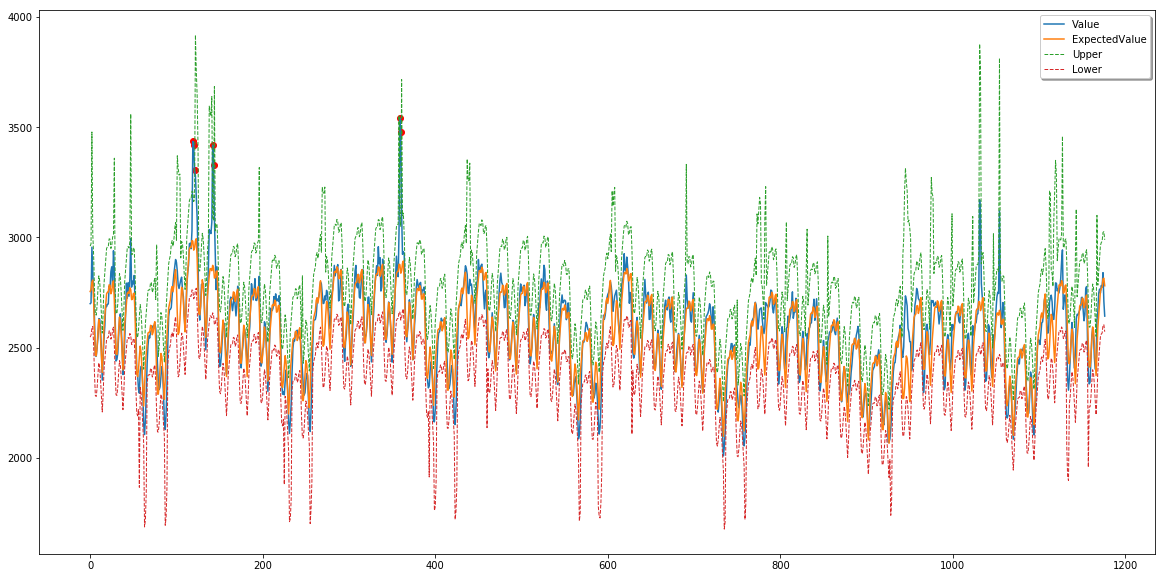

In [5]:
sensitivity = 1.5  # you can change sensitivity here to tune upper and lower boundary
tune(sensitivity)